In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('WeatherData.csv')

# Basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [7]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Check unique values in each column
for column in data.columns:
    print(f"\nUnique values in {column}:\n", data[column].unique()[:10])  # Display first 10 unique values



Missing values:
 Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Unique values in Date/Time:
 ['1/1/2012 0:00' '1/1/2012 1:00' '1/1/2012 2:00' '1/1/2012 3:00'
 '1/1/2012 4:00' '1/1/2012 5:00' '1/1/2012 6:00' '1/1/2012 7:00'
 '1/1/2012 8:00' '1/1/2012 9:00']

Unique values in Temp_C:
 [-1.8 -1.5 -1.4 -1.3 -1.  -0.5 -0.2  0.2  0.8  1.8]

Unique values in Dew Point Temp_C:
 [-3.9 -3.7 -3.4 -3.2 -3.3 -3.1 -3.6 -2.3 -2.1 -2. ]

Unique values in Rel Hum_%:
 [86 87 89 88 85 91 82 81 84 79]

Unique values in Wind Speed_km/h:
 [ 4  7  6  9 15 13 20 22 19 24]

Unique values in Visibility_km:
 [ 8.   4.   4.8  6.4  1.2 12.9 16.1 25.  19.3 24.1]

Unique values in Press_kPa:
 [101.24 101.26 101.27 101.23 101.29 101.2  101.15 100.98 100.79 100.58]

Unique values in Weather:
 ['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly

In [9]:
# Convert 'Date/Time' to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Extract additional time-based features
data['Year'] = data['Date/Time'].dt.year
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['Hour'] = data['Date/Time'].dt.hour

# Display the updated dataset structure
print(data.head())


            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 02:00:00    -1.8              -3.4         89                7   
3 2012-01-01 03:00:00    -1.5              -3.2         88                6   
4 2012-01-01 04:00:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  Year  Month  Day  Hour  
0            8.0     101.24                   Fog  2012      1    1     0  
1            8.0     101.24                   Fog  2012      1    1     1  
2            4.0     101.26  Freezing Drizzle,Fog  2012      1    1     2  
3            4.0     101.27  Freezing Drizzle,Fog  2012      1    1     3  
4            4.8     101.23                   Fog  2012      1    1     4  


In [11]:
# Check for outliers using the interquartile range (IQR) method
numeric_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{col}: Outliers below {lower_bound} or above {upper_bound}")



Temp_C: Outliers below -27.949999999999996 or above 46.849999999999994

Dew Point Temp_C: Outliers below -32.45 or above 38.35000000000001

Rel Hum_%: Outliers below 18.5 or above 118.5

Wind Speed_km/h: Outliers below -7.5 or above 36.5

Visibility_km: Outliers below 22.750000000000004 or above 26.349999999999998

Press_kPa: Outliers below 99.015 or above 103.135


In [13]:
# Display summary statistics for numeric columns
print(data.describe())

                 Date/Time       Temp_C  Dew Point Temp_C    Rel Hum_%  \
count                 8784  8784.000000       8784.000000  8784.000000   
mean   2012-07-01 23:30:00     8.798144          2.555294    67.431694   
min    2012-01-01 00:00:00   -23.300000        -28.500000    18.000000   
25%    2012-04-01 11:45:00     0.100000         -5.900000    56.000000   
50%    2012-07-01 23:30:00     9.300000          3.300000    68.000000   
75%    2012-10-01 11:15:00    18.800000         11.800000    81.000000   
max    2012-12-31 23:00:00    33.000000         24.400000   100.000000   
std                    NaN    11.687883         10.883072    16.918881   

       Wind Speed_km/h  Visibility_km    Press_kPa    Year        Month  \
count      8784.000000    8784.000000  8784.000000  8784.0  8784.000000   
mean         14.945469      27.664447   101.051623  2012.0     6.513661   
min           0.000000       0.200000    97.520000  2012.0     1.000000   
25%           9.000000      24.10

In [15]:
# Compute and visualize correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Fog'

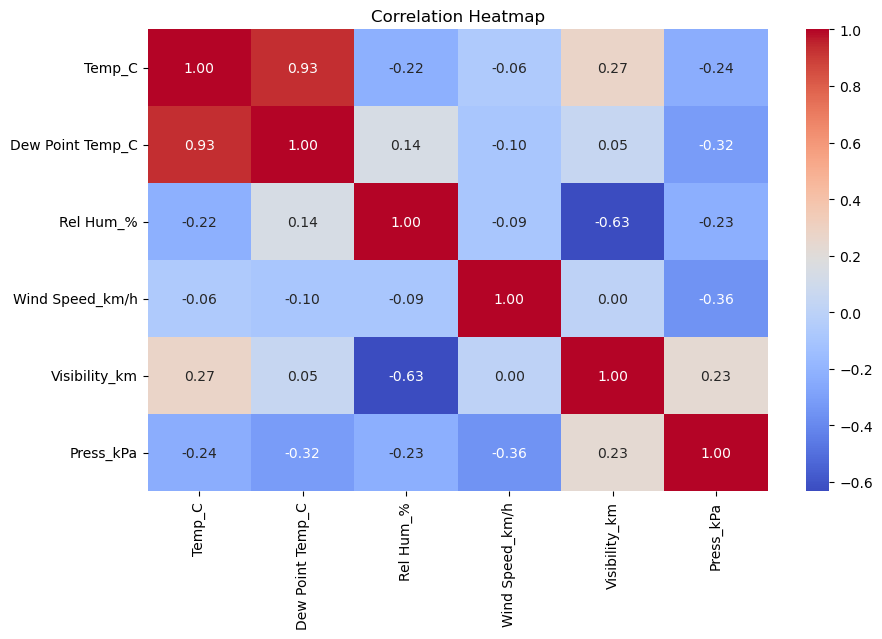

In [17]:
# Exclude non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

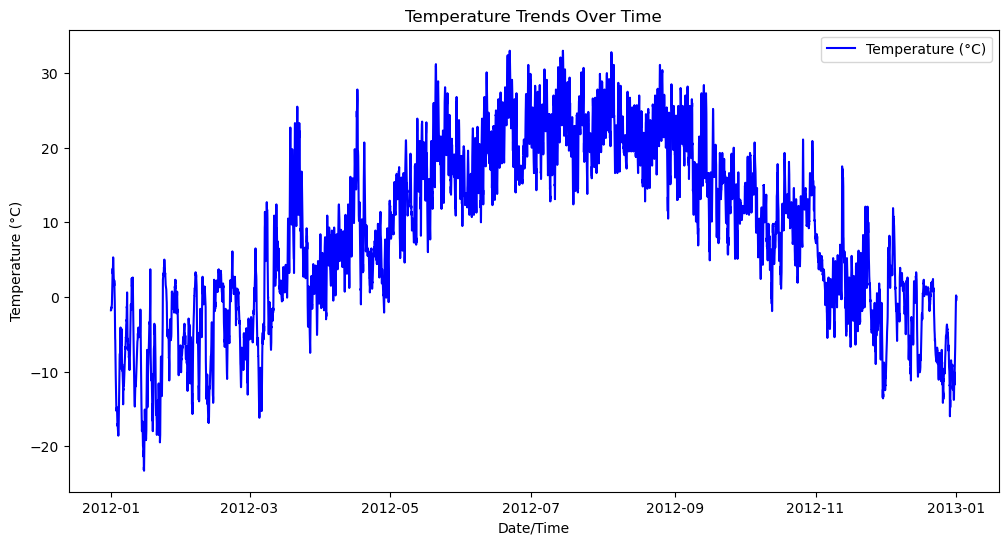

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Temp_C'], label='Temperature (°C)', color='blue')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.show()

C:\Users\yukht\AppData\Local\Temp\ipykernel_25908\1022703411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Weather', order=data['Weather'].value_counts().index, palette='viridis')


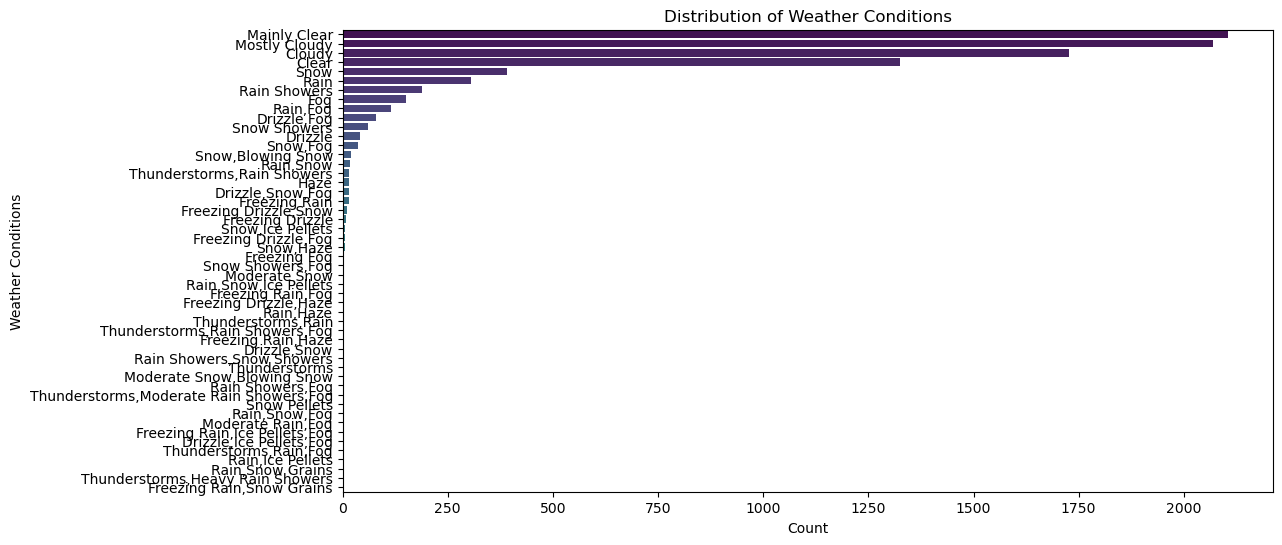

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Weather', order=data['Weather'].value_counts().index, palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.show()

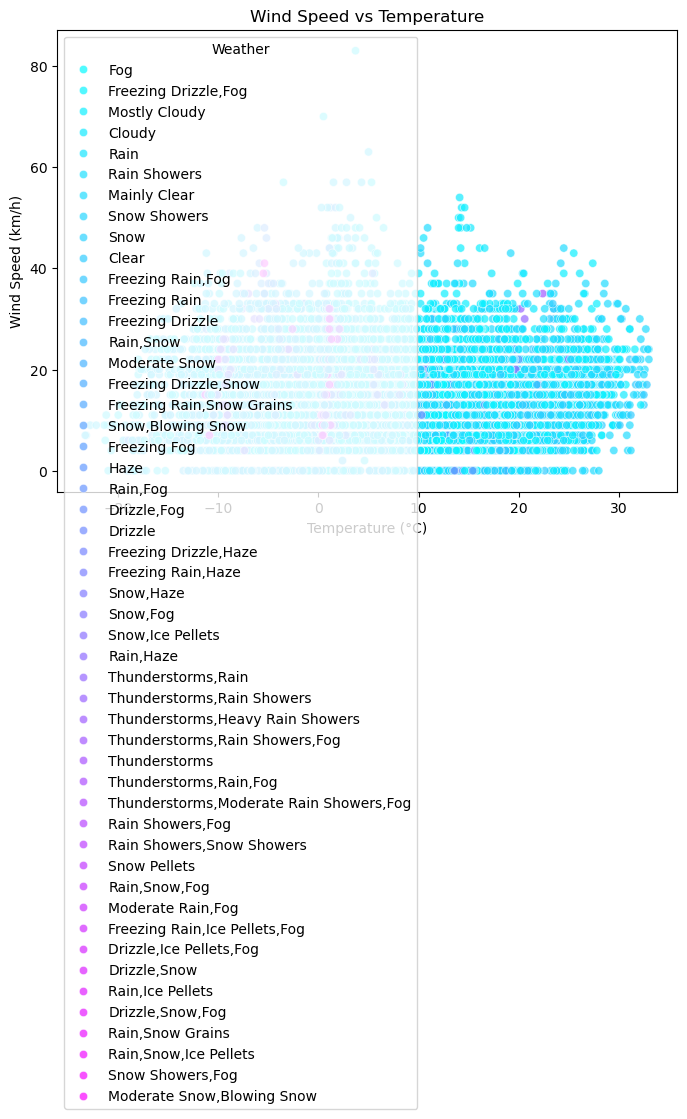

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Temp_C', y='Wind Speed_km/h', hue='Weather', palette='cool', alpha=0.7)
plt.title('Wind Speed vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

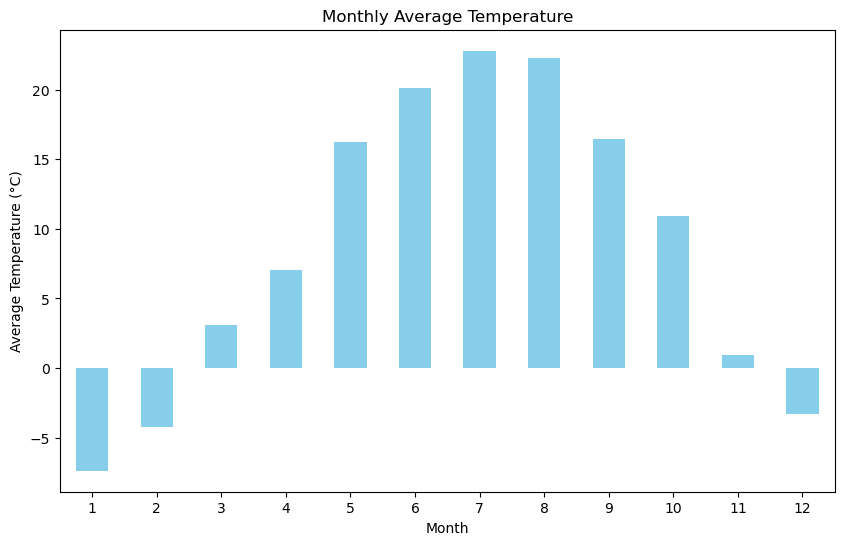

In [25]:
# Calculate monthly average temperature
monthly_avg_temp = data.groupby('Month')['Temp_C'].mean()

# Plot monthly average temperature
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

In [27]:
# Save the cleaned and enriched dataset
data.to_csv('Cleaned_WeatherData_Enhanced.csv', index=False)

In [29]:
# Simplify weather categories
def simplify_weather(weather):
    if 'Fog' in weather:
        return 'Fog'
    elif 'Snow' in weather:
        return 'Snow'
    elif 'Rain' in weather or 'Drizzle' in weather:
        return 'Rain'
    elif 'Clear' in weather:
        return 'Clear'
    elif 'Cloudy' in weather:
        return 'Cloudy'
    else:
        return 'Other'

data['Simplified_Weather'] = data['Weather'].apply(simplify_weather)

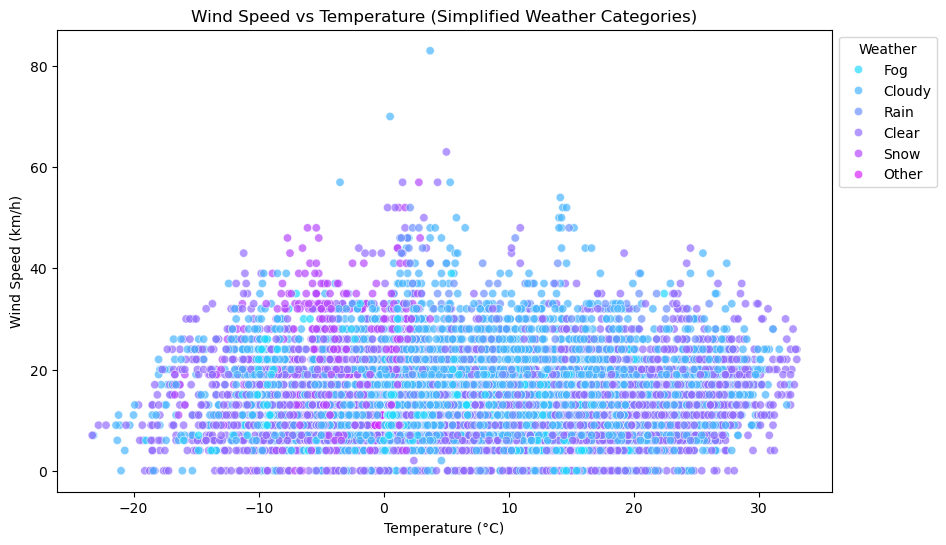

In [31]:
# Scatter plot with simplified weather categories
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='Temp_C', 
    y='Wind Speed_km/h', 
    hue='Simplified_Weather', 
    palette='cool', 
    alpha=0.7
)

plt.title('Wind Speed vs Temperature (Simplified Weather Categories)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (km/h)')
plt.legend(title='Weather', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.show()

In [43]:
def simplify_weather(weather):
    if 'Fog' in weather:
        return 'Fog'
    elif 'Snow' in weather:
        return 'Snow'
    elif 'Rain' in weather or 'Drizzle' in weather:
        return 'Rain'
    elif 'Clear' in weather:
        return 'Clear'
    elif 'Cloudy' in weather:
        return 'Cloudy'
    else:
        return 'Other'

data['Simplified_Weather'] = data['Weather'].apply(simplify_weather)


In [45]:
print(data['Simplified_Weather'].value_counts())

Simplified_Weather
Cloudy    3797
Clear     3432
Rain       585
Snow       526
Fog        426
Other       18
Name: count, dtype: int64


C:\Users\yukht\AppData\Local\Temp\ipykernel_25908\2181846290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


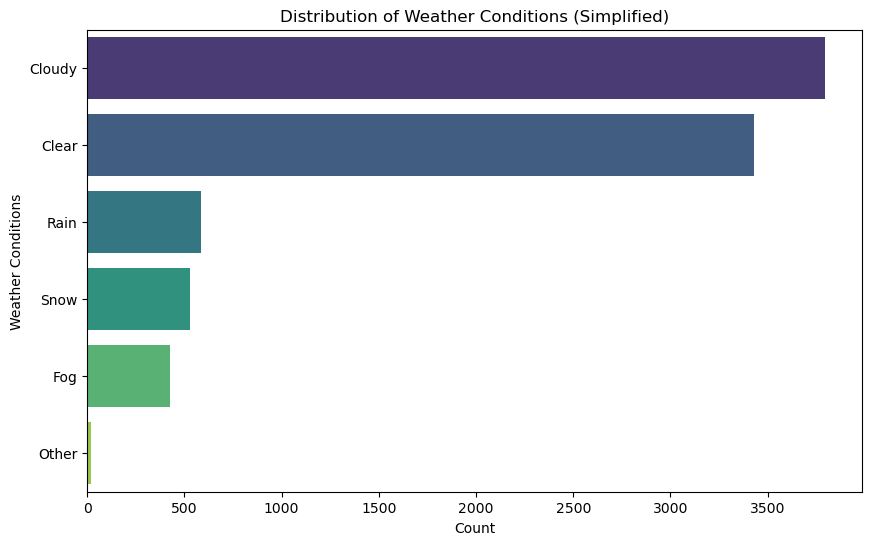

In [47]:
# Weather condition distribution using simplified categories
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data, 
    y='Simplified_Weather', 
    order=data['Simplified_Weather'].value_counts().index, 
    palette='viridis'
)

plt.title('Distribution of Weather Conditions (Simplified)')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.show()